# 作业要求

气温会随着海拔高度的升高而降低, 我们可以通过测量不同海拔高度的气温来预测海拔高度和气温的关系. 

我们假设海拔高度和气温的关系可以使用如下公式表达:

y(气温) = a * x(海拔高度) + b 

理论上来讲, 确定以上公式 a 和 b的值只需在两个不同高度测试, 就可以算出来 a 和 b 的值了. 但是由于所有的设备都是有误差的, 而使用更多的高度测试的值可以使得预测的值更加准确. 

我们提供了在9个不同高度测量的气温值, 请你根据今天学习的线性回归方法预测 a 和 b 的值. 根据这个公式, 我们预测一下在8000米的海拔, 气温会是多少?

数据文件请见date/height.vs.temperature.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

# 数据加载

In [4]:
data = pd.read_csv("data/height.vs.temperature.csv")

In [5]:
data.head()

,height,temperature
0,0.0,12.834044
1,500.0,10.190649
2,1000.0,5.500229
3,1500.0,2.854665
4,2000.0,-0.706488


# 数据可视化分析

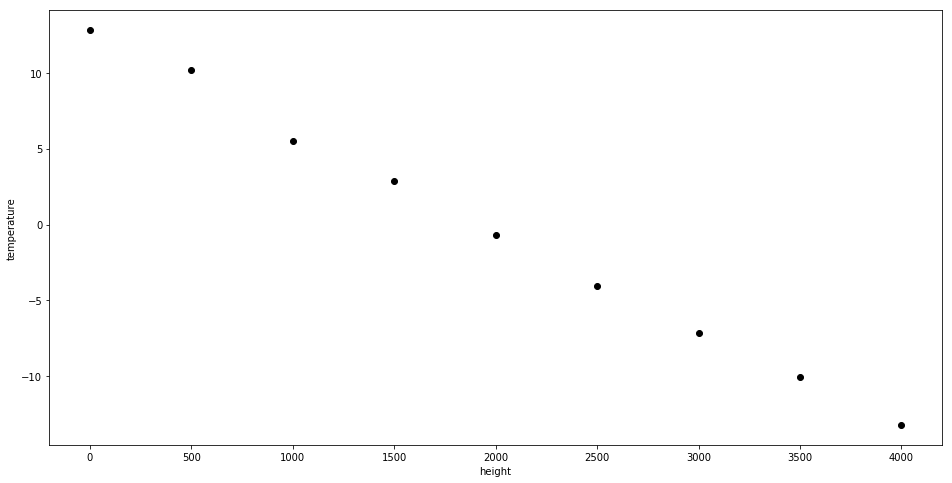

In [7]:
plt.figure(figsize=(16, 8))
plt.scatter(data['height'], data['temperature'], c ='black')
plt.xlabel("height")
plt.ylabel("temperature")
plt.show()

# 线性模型实例化

In [8]:
reg = LinearRegression()
help(reg.fit)

Help on method fit in module sklearn.linear_model.base:

fit(X, y, sample_weight=None) method of sklearn.linear_model.base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : array-like or sparse matrix, shape (n_samples, n_features)
        Training data
    
    y : array_like, shape (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary
    
    sample_weight : numpy array of shape [n_samples]
        Individual weights for each sample
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : returns an instance of self.



In [9]:
X = data['height'].values.reshape(-1,1)
y = data['temperature'].values.reshape(-1,1)

# 线性模型训练（拟合）

In [10]:
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
print('a = {:.3}'.format(reg.coef_[0][0])) 
print('b = {:.3}'.format(reg.intercept_[0]))

print("线性模型为: Y = {:.3}X + {:.3} ".format(reg.coef_[0][0], reg.intercept_[0]))

a = -0.0065695
b = 12.719
线性模型为: Y = -0.0065695X + 12.719 


# 线性模型预测

In [13]:
predictions = reg.predict([[8000]])
print('8000米的海拔, 气温为{:.3}'.format( predictions[0][0]) )

8000米的海拔, 气温为-39.8
